<a href="https://colab.research.google.com/github/Sujal-vajire/Machine-learning-models/blob/main/prediction-student-score-using-and-supervised-ml-v-6/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction-using-and-supervised-ml



In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url = "http://bit.ly/w-data"
dataset=pd.read_csv(url)

In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


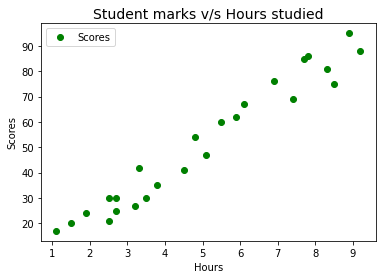

In [7]:
dataset.plot(x='Hours',y='Scores',style='go')
plt.title('Student marks v/s Hours studied',size='14')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [8]:
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

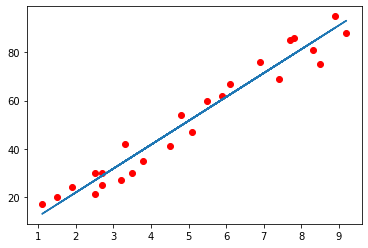

In [11]:
line=reg.coef_*X+reg.intercept_ 
plt.scatter(X,Y,c='red')
plt.plot(X,line)
plt.show()

In [12]:
Y_pred=reg.predict(X_test) 
print(X_test)
com=pd.DataFrame({'Hours':[i[0] for i in X_test],'Actual':Y_test,'Predicted':Y_pred}) 
com

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


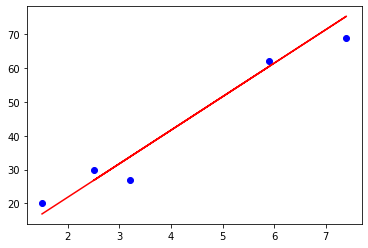

In [13]:
plt.scatter(X_test,Y_test,color='blue')
plt.plot(X_test,Y_pred,color='red')
plt.show()

In [14]:
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(Y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(Y_train,reg.predict(X_train))
print('correlation:',corr)

acc=r2_score(Y_test,Y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.183859899002982
correlation: 0.9515510725211552
Accuracy: 0.9454906892105354


In [15]:
hours= 9.25
predict_the_score=reg.predict(np.array([hours]).reshape(1,1))
print('Number of hours studied = {}'.format(hours))
print('predicted score is = {}'.format(predict_the_score[0]))

Number of hours studied = 9.25
predicted score is = 93.69173248737539


### We got to know that from the model if a student studies for 9.25 hours he/she is going to get 93.69 score